In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ab_browser_test.csv')

In [3]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [4]:
import numpy as np

exp_clicks = np.sum(data[data['slot'] == 'exp'].n_clicks)
control_clicks = np.sum(data[data['slot'] == 'control'].n_clicks)

In [5]:
np.round(100*(exp_clicks/control_clicks - 1) , 3)

1.614

# task 2

In [12]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    #print(indices)
    samples = data[indices]
    return samples

In [13]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [14]:
exp = data[data['slot'] == 'exp'].n_clicks
control = data[data['slot'] == 'control'].n_clicks

In [15]:
np.random.seed(0)

Exp = get_bootstrap_samples(np.array(exp), 1000)

np.random.seed(0)

Control = get_bootstrap_samples(np.array(control), 1000)

In [16]:
exp_median_scores = np.median(Exp, axis = 1)
control_median_scores = np.median(Control, axis = 1)
print(exp_median_scores, control_median_scores)

exp_mean_scores = np.mean(Exp, axis = 1)
control_mean_scores = np.mean(Control, axis = 1)

print("95% confidence interval for the dif median repair time:",  stat_intervals(exp_median_scores-control_median_scores, 0.05))
print("95% confidence interval for the dif mean repair time:",  stat_intervals(exp_mean_scores-control_mean_scores, 0.05))

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.

# task 3

In [63]:
np.random.seed(0)
n_boot_samples = 500

In [64]:
Control_norm = get_bootstrap_samples(np.array(control), n_boot_samples)

In [65]:
Control_norm[:]

array([[ 11,  23,   1, ...,  15,   2,   0],
       [ 49,  16,   1, ...,  15,   0,   2],
       [ 83,  10,   0, ...,   5,   7,   1],
       ...,
       [ 12,   1,   2, ...,   4,   8,   5],
       [  6,   0,   6, ...,  26,  15,  18],
       [  3,  16,   0, ...,   1, 234,   2]], dtype=int64)

In [85]:
Control_norm_mean_scores = np.mean(Control_norm, axis = 1)
print(Control_norm)
n = len(Control_norm)

Delta = []
for i in range(n):
    Delta.append((np.std(Control_norm[i])**2)*n)

control_boot_chi_squared = np.array(Delta)


[[ 11  23   1 ...  15   2   0]
 [ 49  16   1 ...  15   0   2]
 [ 83  10   0 ...   5   7   1]
 ...
 [ 12   1   2 ...   4   8   5]
 [  6   0   6 ...  26  15  18]
 [  3  16   0 ...   1 234   2]]


In [86]:
from scipy.stats import probplot
import pylab

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

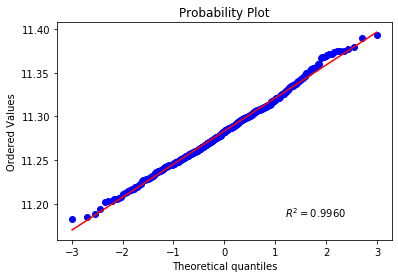

In [90]:
probplot(Control_norm_mean_scores, dist="norm", fit= True, rvalue=True, plot= pylab)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

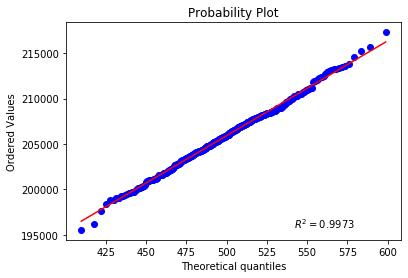

In [91]:
n = len(Control_norm)

probplot(control_boot_chi_squared, dist="chi2", sparams=(n-1), rvalue=True, plot=pylab)

# №5

In [20]:
n_click_control_by_user = data[data['slot']=='control'].groupby(by='userID')['n_clicks'].agg(np.sum)
n_click_exp_by_user = data[data['slot']=='exp'].groupby(by='userID')['n_clicks'].agg(np.sum)

In [21]:
n_click_control_by_user

userID
6         12
8          4
10        22
15         2
23         3
          ..
603128     5
603132     1
603133     1
603135     0
603136     2
Name: n_clicks, Length: 284392, dtype: int64

In [23]:
from scipy import stats 

stats.mannwhitneyu(n_click_control_by_user, n_click_exp_by_user)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [57]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


# task 6

In [58]:
data['browser'].value_counts()

Browser #4     156833
Browser #22    142905
Browser #2     110737
Browser #14     89123
Browser #20     33929
Browser #17     32607
Name: browser, dtype: int64

In [66]:
List = ['Browser #4', 'Browser #22', 'Browser #2', 'Browser #14', 'Browser #20', 'Browser #17']

P = []
for elem in List:
    temp_exp = np.array(data[data['slot']=='exp'][data['browser'] == elem].n_clicks)
    temp_control = np.array(data[data['slot']=='control'][data['browser'] == elem].n_clicks)
    print(temp_exp)
    P.append(stats.mannwhitneyu(temp_exp, temp_control, alternative = 'two-sided').pvalue)
    print(stats.mannwhitneyu(temp_exp, temp_control))
    

C:\Users\Mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[ 3 29 54 ...  0  2  0]
MannwhitneyuResult(statistic=3072447765.0, pvalue=0.40760617658454984)
[ 2 21 25 ...  1  2  0]
MannwhitneyuResult(statistic=2547597959.5, pvalue=0.2574055152210032)
[23  7 39 ...  4  4  3]
MannwhitneyuResult(statistic=1522572720.0, pvalue=0.0272438604197241)
[ 2  4 22 ...  3  0  1]
MannwhitneyuResult(statistic=806984730.5, pvalue=0.0)
[ 4 65  1 ...  6  0  2]
MannwhitneyuResult(statistic=143791805.0, pvalue=0.45366656388735377)
[ 7 63 83 ...  1  1  0]
MannwhitneyuResult(statistic=131389681.0, pvalue=0.03740060143010802)


In [67]:
P

[0.8152123531690997,
 0.5148110304420064,
 0.0544877208394482,
 0.0,
 0.9073331277747075,
 0.07480120286021603]

In [68]:
from statsmodels.sandbox.stats.multicomp import multipletests 

reject, p_corrected, a1, a2 = multipletests(P, alpha = 0.05, method = 'holm') 

In [69]:
p_corrected

array([1.        , 1.        , 0.2724386 , 0.        , 1.        ,
       0.29920481])

# 7

In [76]:
List = ['Browser #4', 'Browser #22', 'Browser #2', 'Browser #14', 'Browser #20', 'Browser #17']

nonclick = []
for elem in List:
    a_exp = np.array(data[data['slot']=='exp'][data['browser'] == elem].n_nonclk_queries)
    b_exp = np.array(data[data['slot']=='exp'][data['browser'] == elem].n_queries)
    temp_exp = a_exp/b_exp * 100
    a_control = np.array(data[data['slot']=='control'][data['browser'] == elem].n_nonclk_queries)
    b_control = np.array(data[data['slot']=='control'][data['browser'] == elem].n_queries)
    temp_control = a_control/b_control * 100

C:\Users\Mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [77]:
temp_exp

array([ 40.        ,  42.04545455,  23.52941176, ...,   0.        ,
         0.        , 100.        ])

In [78]:
temp_control

array([  0.        ,   0.        ,  17.07317073, ...,   0.        ,
         0.        , 100.        ])

In [82]:
p_new = stats.mannwhitneyu(temp_exp, temp_control, alternative = 'two-sided').pvalue
p_new

0.9655402907665587

In [80]:
reject, p_corrected, a1, a2 = multipletests(p_new, alpha = 0.05, method = 'holm') 

In [81]:
p_corrected

array([0.96554029])